## Importing the required python liberaries

In [379]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Mounting Drive 

In [380]:
from google.colab import drive 
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


## Reading the input files

In [381]:
companies = pd.read_csv("/content/gdrive/My Drive/MS/Investment/companies.csv", sep=",", encoding = "unicode_escape")
rounds2 = pd.read_csv("/content/gdrive/My Drive/MS/Investment/rounds2.csv",encoding='unicode_escape')
mapping = pd.read_csv("/content/gdrive/My Drive/MS/Investment/mapping.csv", encoding = "unicode_escape")

In [382]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [383]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Planet-Expat,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [384]:
companies.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [385]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [386]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [387]:
rounds2.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [388]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [389]:
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [390]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

## Unique companies are present in rounds2
##### We can see there is difference in the permalink values.Some of them are in lower and some of them are in upper case.

In [391]:
## Converting the primary key permalink to lower case for further merging of data
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [392]:
# unique companies count in round2 file
rounds2_unq=len(rounds2["company_permalink"].unique())
rounds2_unq

66370

In [393]:
# unique companies count in compaines file
companies_unq=len(companies.permalink.unique())
companies_unq

66368

## companies in the rounds2 file which are not present in companies file ?

In [394]:
## Comparing rounds2 with companies table.
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [395]:
## Comparing companies with rounds2 table.
companies[~companies['permalink'].isin(rounds2['company_permalink'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [396]:
## There are some characters which we can't read. So, better remove these.

In [397]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore') # Removing problematic characters

print(f"There are {rounds2.company_permalink.nunique()} unique rows in rounds2 table.")

There are 66368 unique rows in rounds2 table.


In [398]:
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore') # Removing problematic characters

print(f"There are {companies.permalink.nunique()} unique rows in companies table.")

There are 66368 unique rows in companies table.


In [399]:
rounds2_unq=len(rounds2["company_permalink"].unique())
rounds2_unq

66368

In [400]:
companies_unq=len(companies.permalink.unique())
companies_unq

66368

In [401]:
## Again comparing rounds2 with companies table.
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


#### * Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. 
#### * Name the merged data frame as <b>"master_frame"</b>. 
## How many observations are present in master_frame?

In [402]:
master_frame = pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [403]:
master_frame.shape

(114949, 16)

## Data Cleaning

In [404]:
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [405]:
## Missing values per column expressed as % of total number of values
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [406]:
## First we can remove the NULL values from "raised_amount_usd","country_code" and "category_list" as these are the important columns for our analysis.

In [407]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [408]:
## Removal of NULL values
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [409]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [410]:
master_frame['country_code'].isnull().sum()

5851

In [411]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [412]:
master_frame['category_list'].isnull().sum()

579

In [413]:
master_frame=master_frame[~master_frame.category_list.isnull()]

In [414]:
master_frame.shape

(88529, 16)

In [415]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.67
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.96
region                      1.34
city                        1.33
founded_at                 15.10
dtype: float64

In [416]:
## Now we can remove the unwanted or Duplicate columns and non-contributing columns and also this data is not required for the analysis.

In [417]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('permalink', axis=1)

In [418]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [419]:
## We can now remove the remaining NULL values if required

In [420]:
master_frame=master_frame[~master_frame.state_code.isnull()]
master_frame=master_frame[~master_frame.region.isnull()]
master_frame=master_frame[~master_frame.city.isnull()]

In [421]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
dtype: float64

In [422]:
## Now we have a very clean data for our analysis.

## Checkpoint 2: Funding Type Analysis

In [423]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'convertible_note', 'private_equity',
       'debt_financing', 'angel', 'grant', 'undisclosed',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [424]:
# Frequency of every type of funding
master_frame.funding_round_type.value_counts()

venture                  46886
seed                     20372
debt_financing            6465
angel                     4275
grant                     1890
private_equity            1763
convertible_note          1298
undisclosed               1251
equity_crowdfunding       1099
post_ipo_equity            585
product_crowdfunding       323
post_ipo_debt              150
non_equity_assistance       59
secondary_market            28
Name: funding_round_type, dtype: int64

In [425]:
## There are total 14 unique investment type available to choose from. As Spark fund is willing to invest between 5M to 15M per round. 
## Therefore,filtering rows with funding_round_type in seed,angel,venture,private_equity only. 
## We can drop all rows which are not of type venture, seed, angel, private_equity

In [426]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

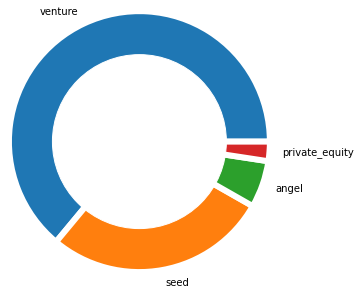

venture           46886
seed              20372
angel              4275
private_equity     1763
Name: funding_round_type, dtype: int64


In [427]:
round_types = master_frame.funding_round_type.value_counts()

# Create a pieplot
plt.pie(round_types.values, labels=round_types.index, radius=1.5, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white' })

# add a circle at the center
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
print(round_types)

In [428]:
# We can choose aggregate functions mean to get the average funding raised for each funding types
master_by_fundtype = master_frame.groupby('funding_round_type')
mean = master_by_fundtype['raised_amount_usd'].mean().sort_values(ascending = False)
mean

funding_round_type
private_equity    7.082810e+07
venture           1.174273e+07
angel             9.776435e+05
seed              7.424031e+05
Name: raised_amount_usd, dtype: float64

In [429]:
# Average funding amount for venture type
venture_mean = master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(venture_mean, 2)}")

Average funding amount raised: 11742729.66


In [430]:
# Average funding amount for seed type
seed_mean = master_frame[master_frame['funding_round_type']=='seed'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(seed_mean, 2)}")

Average funding amount raised: 742403.12


In [431]:
# Average funding amount for private equity type
equity_mean = master_frame[master_frame['funding_round_type']=='private_equity'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(equity_mean, 2)}")

Average funding amount raised: 70828095.71


In [432]:
# Average funding amount for angel type
angel_mean = master_frame[master_frame['funding_round_type']=='angel'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(angel_mean, 2)}")

Average funding amount raised: 977643.53


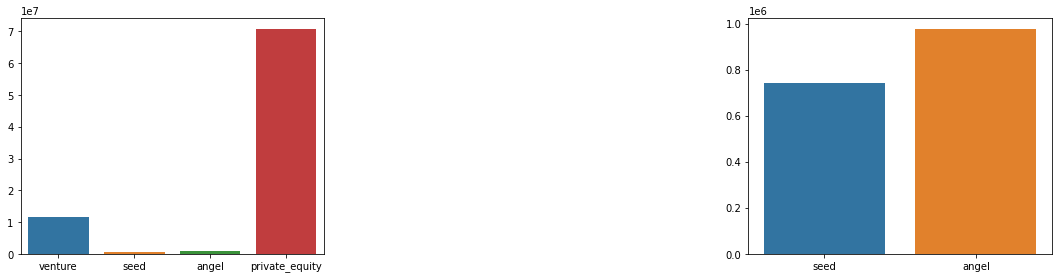

In [433]:
plt.figure(figsize=(25, 20))
ax1 = plt.subplot(4, 4, 1)
ax2 = plt.subplot(4, 4, 3)
sns.barplot(x=round_types.index, y=[venture_mean, seed_mean, angel_mean, equity_mean], ax=ax1)
sns.barplot(x=round_types.index[1:3], y=[seed_mean, angel_mean], ax=ax2)
plt.show()

In [434]:
# Finding Most suitable investment type
invest_dict = {'venture': venture_mean, 'angel': angel_mean, 'seed': seed_mean, 'equity': equity_mean}
for invest_type in invest_dict:
    if invest_dict[invest_type] > 5000000 and invest_dict[invest_type] < 15000000:
        print(f"Most suitable investment type for Spark Funds is: {invest_type}")

Most suitable investment type for Spark Funds is: venture


## Checkpoint 3: Country Analysis

In [435]:
## Further filtering the data so that it only contains the data for the investment type i.e venture

In [436]:
venture_df = master_frame[master_frame["funding_round_type"]=="venture"]
venture_df.shape

(46886, 12)

In [437]:
## Finding top 10 countries which have received the highest total funding. This can be done by looking at the aggregation of the raised amount in each country.

In [438]:
venture_by_country = venture_df.groupby('country_code')
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

country_code
USA    4.194432e+11
CHN    3.695087e+10
GBR    1.923553e+10
IND    1.416781e+10
CAN    9.435487e+09
FRA    6.825021e+09
ISR    6.551761e+09
DEU    6.180782e+09
JPN    3.018150e+09
SWE    3.017689e+09
Name: raised_amount_usd, dtype: float64

In [439]:
top10 = venture_df[venture_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN","SWE"])]

In [440]:
top10=top10[~top10.category_list.isnull()]

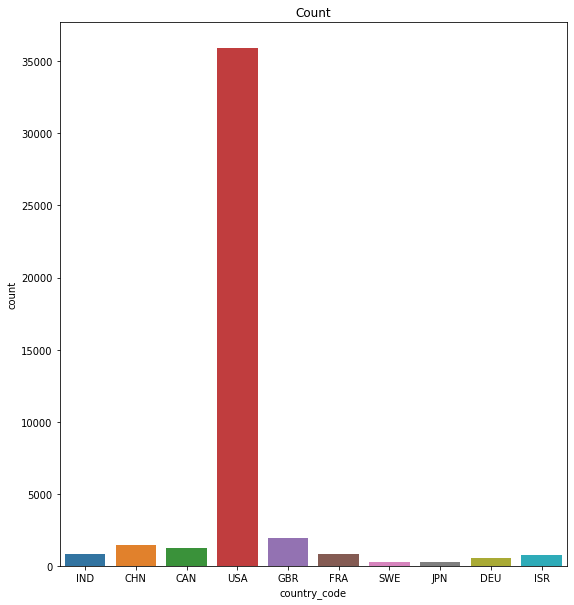

Top 3 english speaking countries in order are: USA, GBR, IND


In [441]:
# Plotting sum across top 10 country_code 

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top10)
plt.title("Count")
plt.show()
print("Top 3 english speaking countries in order are: USA, GBR, IND")

In [442]:
top10.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,10 Minutes With,Education,operating,GBR,H9,London,London
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,1000memories,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox


In [443]:
# Let's now create a new data frame with only these 3 countires data.
top3_english = top10[top10['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.194432e+11
GBR    1.923553e+10
IND    1.416781e+10
Name: raised_amount_usd, dtype: float64

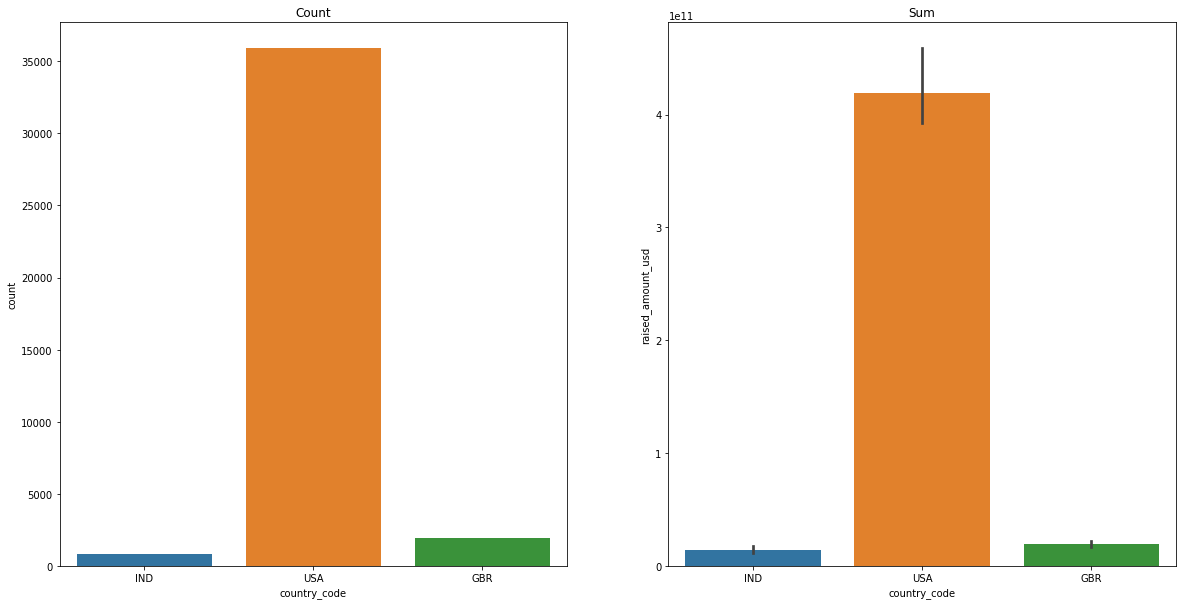

In [444]:
# Plotting sum across top 3 english official language country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top3_english)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top3_english, estimator=sum)
plt.title("Sum")
plt.show()

In [445]:
## Here we can see there is a "|" symbol in category_list. For some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). 
## For example, one of the companies’ category_list is Apps|Cable|Distribution|Software.
## So, we have to Extract the primary sector in separate column category_list of each category list from the category_list column by selecting 1st value before '|' symbol.

In [446]:
top10['primary_sector'] = top10['category_list'].astype(str).apply(lambda x: x.split('|')[0])
top10.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,10 Minutes With,Education,operating,GBR,H9,London,London,Education
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,1000memories,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,Curated Web
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,Curated Web


## Checkpoint 4: Sector Analysis 1

In [447]:
## For further analysis and mapping, removing the null rows from the mapping dataframe.
mapping=mapping[~mapping.category_list.isnull()]
mapping.head(25)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [448]:
## It can be observed from the data that at many places in the category_list column the 'na' is misprinded as '0'
## Eg. 'Analytics' is present as 'A0lytics'

In [449]:
# correcting improperly decoded words from mapping.csv
mapping.reset_index(inplace=True)
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')

In [450]:
## Mapping the category_list in the top10 dataframe to the main_sector in the mapping file.
## Before merging these two dataframe, creating a new column main_sector in mapping dataframe to get the main sector name of each category.

In [451]:
map=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
map=map[map.value==1]
map=map.drop('value',axis=1)
map.shape

(688, 2)

In [452]:
map.head()

,category_list,main_sector
0,3D,index
694,Adventure Travel,Automotive & Sports
700,Aerospace,Automotive & Sports
731,Auto,Automotive & Sports
732,Automated Kiosk,Automotive & Sports


In [453]:
## Merging these two dataframe
top10=pd.merge(top10,map,how="left",left_on="primary_sector",right_on="category_list")

In [454]:
top10.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,state_code,region,city,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [455]:
top10.shape

(43995, 15)

In [456]:
top10['main_sector'].head()

0                              Entertainment
1                 News, Search and Messaging
2                 Cleantech / Semiconductors
3    Social, Finance, Analytics, Advertising
4    Social, Finance, Analytics, Advertising
Name: main_sector, dtype: object

In [457]:
## Checking for null in the main_sector column of the merged data frame.
len(top10[top10['main_sector'].isnull()])

180

In [458]:
## There are 180 rows with missing main_sector values. Hence, removing such rows.
top10=top10[~(top10['main_sector'].isnull())]

In [459]:
len(top10[top10['main_sector'].isnull()])

0

In [460]:
## Creating three separate data frames D1, D2 and D3 for each of the top three countries (USA, GBR, IND) 
## containing the observations of funding type venture falling within the 5-15 million USD range.

In [461]:
## Sector Analysis - USA
D1=top10[top10['country_code']=='USA']
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]
print("Total amount raised in USA is", + D1.raised_amount_usd.sum())

Total amount raised in USA is 107393032962.0


In [462]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,state_code,region,city,primary_sector,category_list_y,main_sector
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,Apps,"News, Search and Messaging"
28,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,Service Providers,Service Providers,Others
31,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing,Manufacturing
32,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing,Manufacturing


In [463]:
D1.raised_amount_usd.count()

12022

In [464]:
## Finding the top sectors with the highest number of investments in USA.
D1_by_sector=D1.groupby('main_sector')
D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     2949
Social, Finance, Analytics, Advertising    2711
Cleantech / Semiconductors                 2298
News, Search and Messaging                 1580
Health                                      909
Name: raised_amount_usd, dtype: int64

In [465]:
D1_by_sector['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector
Others                                     2.630901e+10
Social, Finance, Analytics, Advertising    2.378738e+10
Cleantech / Semiconductors                 2.118798e+10
News, Search and Messaging                 1.394034e+10
Health                                     8.211859e+09
Name: raised_amount_usd, dtype: float64

In [466]:
## Finding the highest invested company among the 1st Top sectors of the country.
D1[D1['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink                
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [467]:
## Finding the highest invested company among the 2nd Top sectors of the country.

D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()


main_sector                              company_permalink        
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

In [468]:
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()


main_sector                 company_permalink          
Cleantech / Semiconductors  /organization/biodesix         75300000.0
                            /organization/tigo-energy      68739496.0
                            /organization/forsight-labs    61300001.0
                            /organization/rheonix          56124758.0
                            /organization/scienergy        55375423.0
Name: raised_amount_usd, dtype: float64

In [469]:
## Sector Analysis - GBR (United Kingdom)

In [470]:
## Creating Data frame D2 for country GBR

D2=top10[top10['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D2_by_sector=D2.groupby('main_sector')

In [471]:
## Finding the top sectors with the highest number of investments in GBR.

D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     145
Social, Finance, Analytics, Advertising    130
Cleantech / Semiconductors                 118
News, Search and Messaging                  70
Entertainment                               55
Name: raised_amount_usd, dtype: int64

In [472]:
D2_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)


main_sector
Others                                     1.273239e+09
Social, Finance, Analytics, Advertising    1.068995e+09
Cleantech / Semiconductors                 1.065548e+09
News, Search and Messaging                 5.981207e+08
Entertainment                              4.767237e+08
Manufacturing                              3.305364e+08
Health                                     1.867220e+08
Automotive & Sports                        1.470452e+08
index                                      1.452928e+07
Name: raised_amount_usd, dtype: float64

In [473]:
## Total amount raised in GBR
D2.raised_amount_usd.sum()

5161458874.0

In [474]:
D2.raised_amount_usd.count()

591

In [475]:
D2.shape

(591, 15)

In [476]:
## Finding the highest invested company among the 1st Top sectors of the country.

In [477]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink                    
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [478]:
## Finding the highest invested company among the 2nd Top sectors of the country.

In [479]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              company_permalink                  
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [480]:
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 company_permalink                                                          
Cleantech / Semiconductors  /organization/eusa-pharma                                                      35600000.0
                            /organization/horizon-discovery                                                31353719.0
                            /organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
                            /organization/elixent                                                          25000000.0
                            /organization/takeda-cambridge                                                 22340000.0
Name: raised_amount_usd, dtype: float64

In [481]:
## Sector Analysis - India
## Creating Data frame D3 for country IND

D3=top10[top10['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
D3_by_sector=D3.groupby('main_sector')

In [482]:
## Finding the top sectors with the highest number of investments in IND.

D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         12
Name: raised_amount_usd, dtype: int64

In [483]:
D3_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.219000e+08
Name: raised_amount_usd, dtype: float64

In [484]:
D3.shape

(327, 15)

In [485]:
D3.raised_amount_usd.sum()

2934543602.0

In [486]:
D3.raised_amount_usd.count()

327

In [487]:
## Finding the highest invested company among the 1st Top sectors of the country.

D3[D3['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()


main_sector  company_permalink             
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [488]:
## Finding the highest invested company among the 2nd Top sectors of the country.

D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              company_permalink                       
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

In [489]:
D3[D3['main_sector']=='News, Search and Messaging'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 company_permalink                             
News, Search and Messaging  /organization/gupshup-technology-india-pvt-ltd    33000000.0
                            /organization/imimobile                           23000000.0
                            /organization/sms-gupshup                         22000000.0
                            /organization/hike                                21000000.0
                            /organization/roadrunnr                           21000000.0
Name: raised_amount_usd, dtype: float64

## Checkpoint 6: Plots

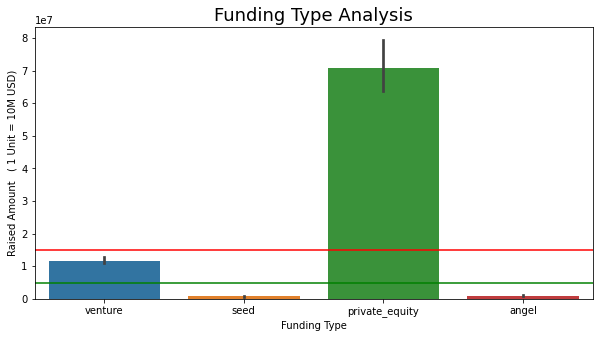

In [490]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
#g.set_ylim(0, 20000000)
#g.set_yscale('log')
g.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

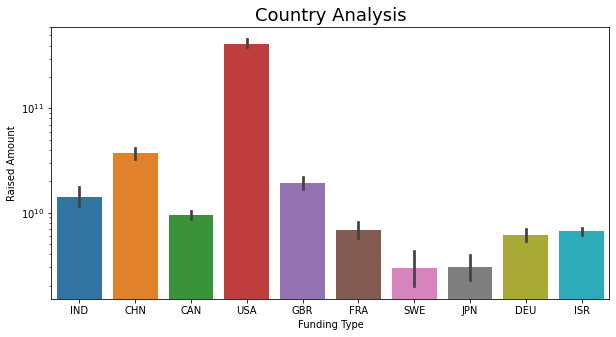

In [491]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top10, estimator=np.sum)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

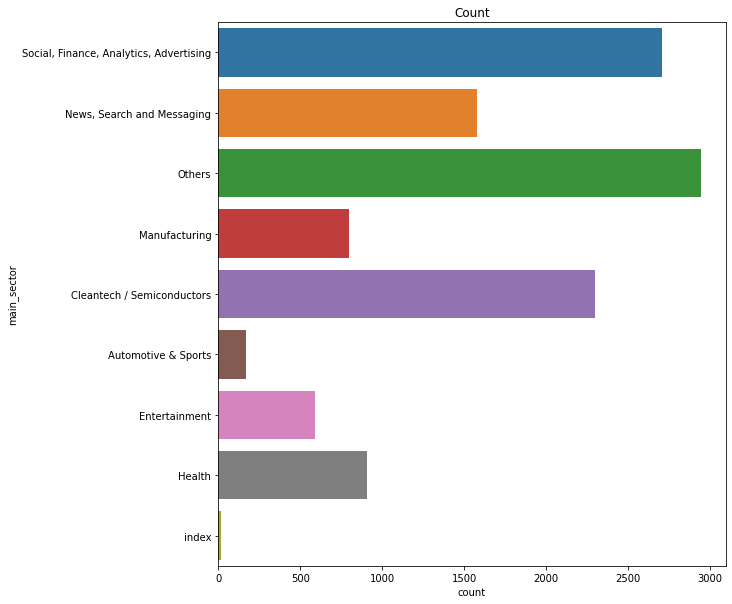

In [492]:
## USA

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D1)
plt.title("Count")
plt.show()

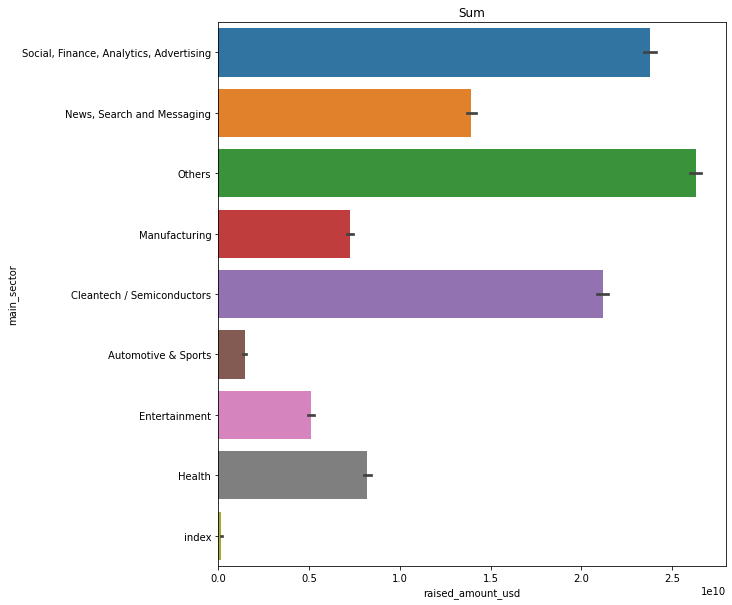

In [493]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum")
plt.show()

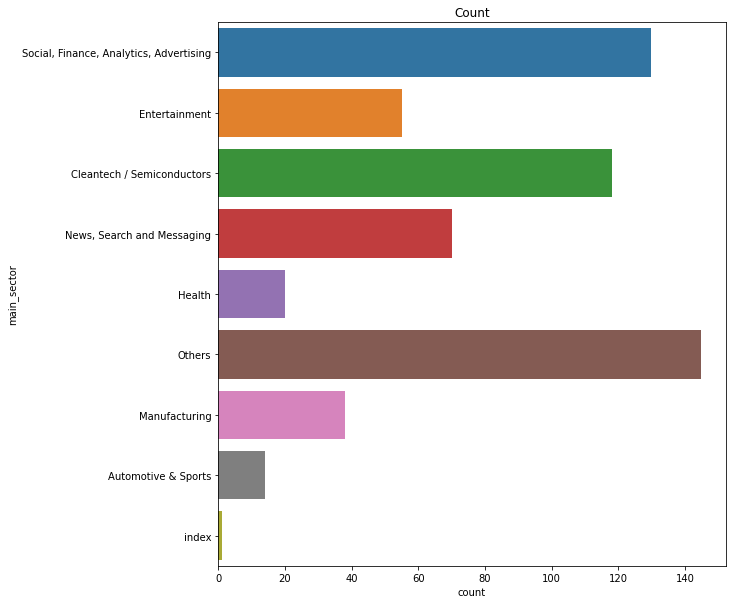

In [494]:
## Great Britian

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D2)
plt.title("Count")
plt.show()

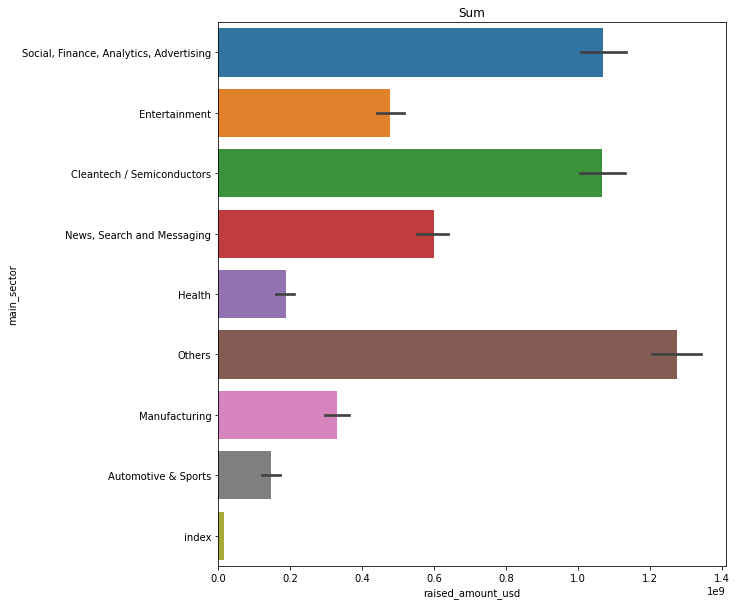

In [495]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum")
plt.show()

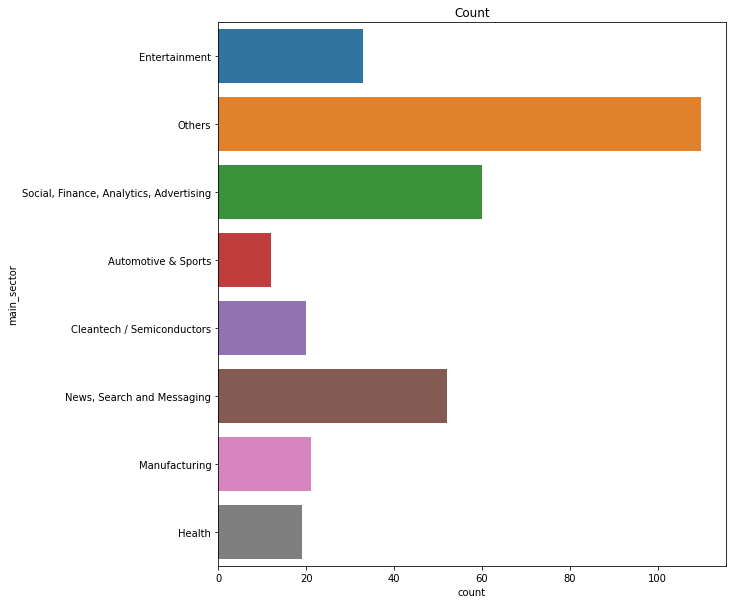

In [496]:
## INDIA

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D3)
plt.title("Count")
plt.show()

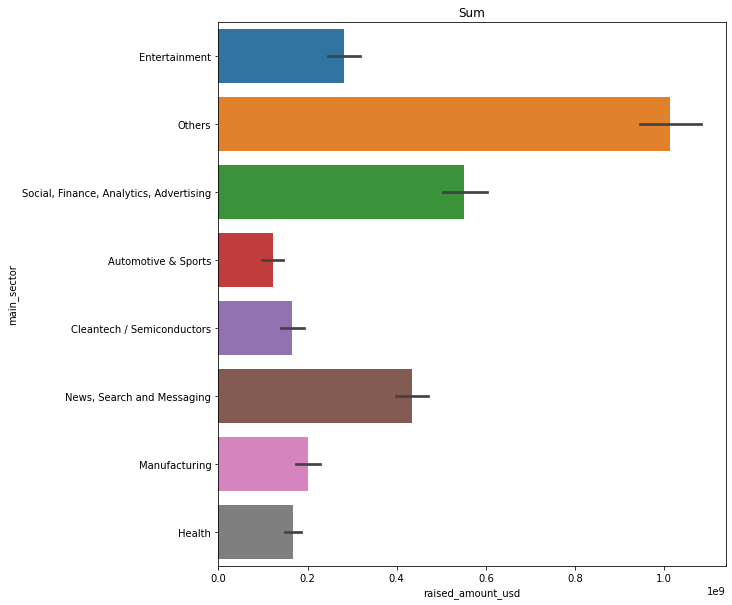

In [497]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D3, estimator=sum)
plt.title("Sum")
plt.show()

In [498]:
## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture)
## For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.

In [499]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
master_D.shape


(7958, 15)

In [500]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)
master_D.shape

(8351, 15)

In [501]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)
master_D.shape

(8573, 15)

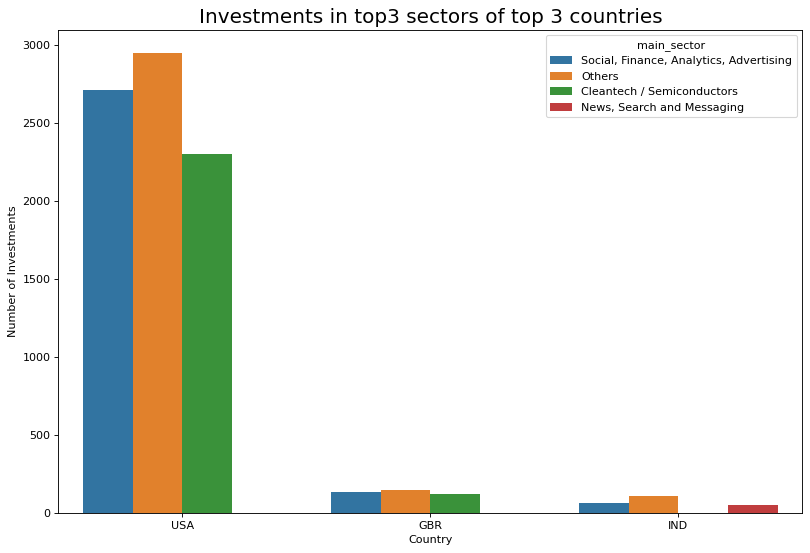

In [502]:
## Using the master_D dataframe to plot the sector wise investment count of the top 3 sectors of the top3 countries.
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()